# Bharat Intern Machine Learning Virtual Internship

In [1]:
#Performing task-2 wine quality 

In [2]:
#Importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Importing the dataset
data = pd.read_csv("C:\\Users\\G.Madhu mitha\\Downloads\\winequality.csv")
data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(6497, 13)

In [5]:
data.columns

Index(['Type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [8]:
data['Type'].unique()

array(['Red', 'White'], dtype=object)

In [9]:
data['Type'].value_counts()

White    4898
Red      1599
Name: Type, dtype: int64

In [10]:
#Unique values in the dataset
data.nunique()

Type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [11]:
#finding correlation
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [12]:
data.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.680740,0.046745,0.061122,-0.690720,0.013544,-6.506003,-24.112030,0.001784,-0.052675,0.057792,-0.147594,-0.086882
volatile acidity,0.046745,0.027105,-0.009043,-0.153537,0.002175,-1.030242,-3.856933,0.000134,0.006921,0.005536,-0.007391,-0.038200
citric acid,0.061122,-0.009043,0.021117,0.098490,0.000199,0.343372,1.603646,0.000042,-0.007706,0.001215,-0.001819,0.010854
residual sugar,-0.690720,-0.153537,0.098490,22.636696,-0.021492,34.021685,133.244854,0.007883,-0.204498,-0.131635,-2.039567,-0.153646
chlorides,0.013544,0.002175,0.000199,-0.021492,0.001227,-0.121284,-0.553714,0.000038,0.000252,0.002062,-0.010735,-0.006139
free sulfur dioxide,-6.506003,-1.030242,0.343372,34.021685,-0.121284,315.041192,723.261972,0.001369,-0.416249,-0.497756,-3.807165,0.859664
total sulfur dioxide,-24.112030,-3.856933,1.603646,133.244854,-0.553714,723.261972,3194.720039,0.005491,-2.166696,-2.319079,-17.914646,-2.042704
density,0.001784,0.000134,0.000042,0.007883,0.000038,0.001369,0.005491,0.000009,0.000006,0.000116,-0.002456,-0.000801
pH,-0.052675,0.006921,-0.007706,-0.204498,0.000252,-0.416249,-2.166696,0.000006,0.025853,0.004597,0.023252,0.002739
sulphates,0.057792,0.005536,0.001215,-0.131635,0.002062,-0.497756,-2.319079,0.000116,0.004597,0.022143,-0.000538,0.005001


In [13]:
#Performing exploratory data analysis
data.isna().sum()

Type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

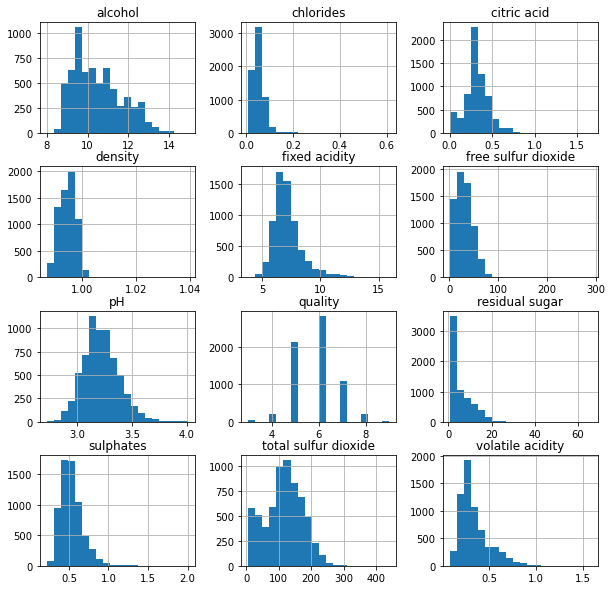

In [19]:
#Histogram plot
import matplotlib.pyplot as plt
data.hist(bins=20,figsize=(10,10))
plt.show()

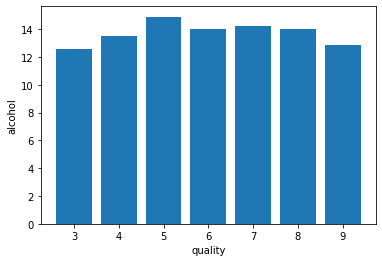

In [20]:
#Bar plot
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

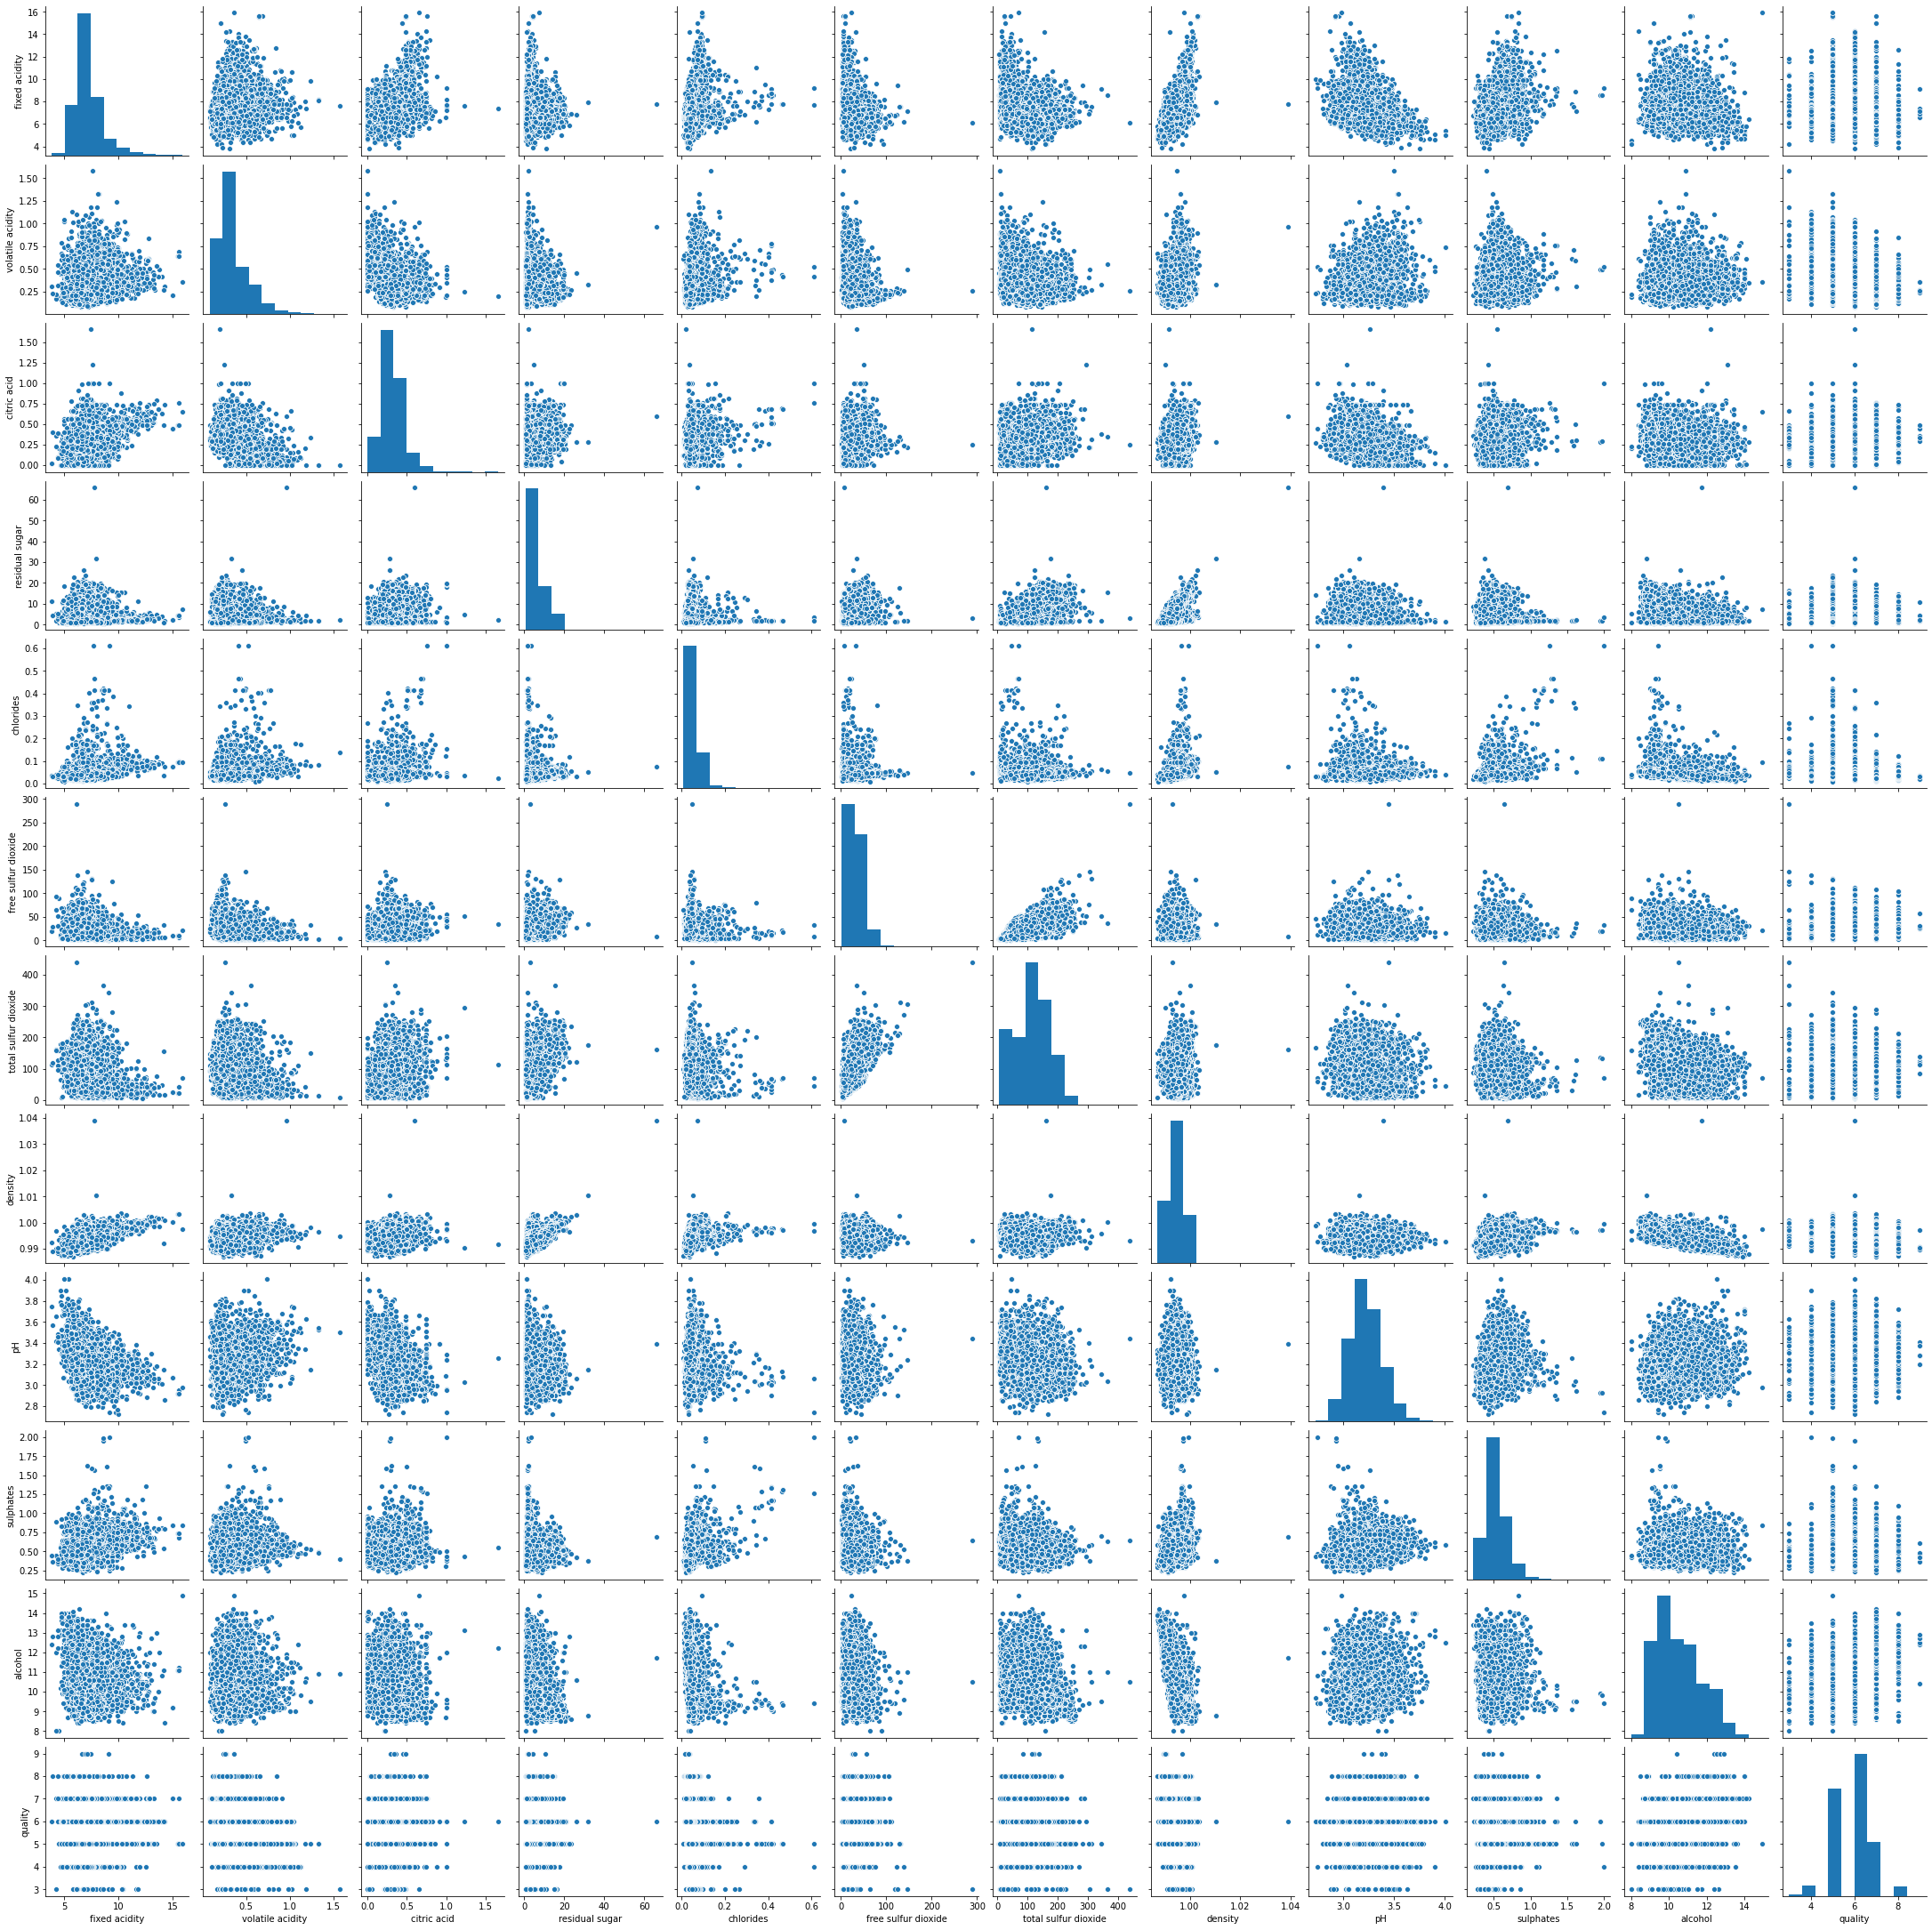

In [21]:
import seaborn as sn
sn.pairplot(data)

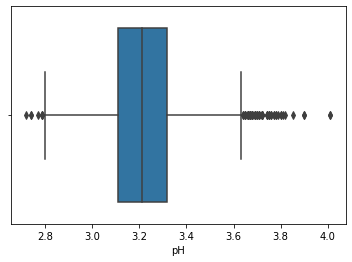

In [44]:
sn.boxplot(data['pH'])

In [14]:
q1 = data['pH'].quantile(.25)
q3 = data['pH'].quantile(.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

3.11
3.32
0.20999999999999996


In [15]:
data = data[data.pH<upper_limit]
data = data[data.pH>lower_limit]

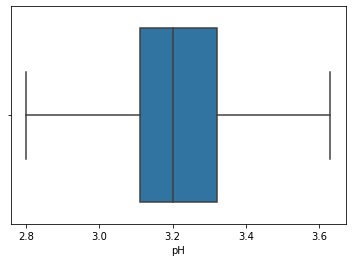

In [52]:
sn.boxplot(data['pH'])

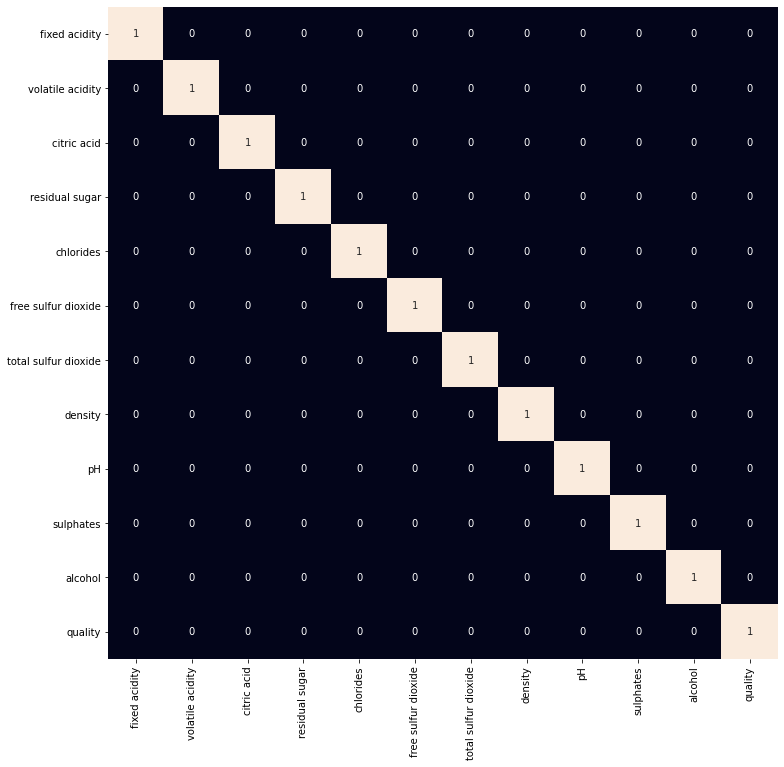

In [22]:
#Heat Map
plt.figure(figsize=(12, 12))
sn.heatmap(data.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [16]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]

In [17]:
#changing the datatype of tyoe from object to integer
data.replace({'White':1,'Red':0},inplace=True)
data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [18]:
X = data.drop(['quality', 'best quality'], axis=1)
X.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
X.shape

(6424, 12)

In [20]:
y = data.iloc[:,-1]
print(y.head())

0    0
1    0
2    0
3    1
4    0
Name: best quality, dtype: int64


In [21]:
y.shape

(6424,)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape, X_test.shape

((5139, 12), (1285, 12))

In [24]:
#Normalising the data
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
#Training the model
model = LogisticRegression()
model

LogisticRegression()

In [26]:
#Fititng the model to training data
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
from sklearn import metrics
#Training accuracy
metrics.roc_auc_score(y_train, model.predict(X_train))

0.7055220201641705

In [28]:
#Test data accuracy
metrics.roc_auc_score(y_test, model.predict(X_test))

0.6925480173236904

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(accuracy_score(y_test,y_pred))

0.7322957198443579


[[263 188]
 [164 685]]


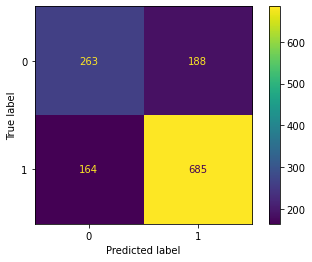

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
metrics.plot_confusion_matrix(model,X_test,y_test)